# Business understanding

There are over 7 million listings worldwide in over 220 countries and regions. As someone who is interested in exploring ways to earn passive income. I am curious about:

1. What factors determine the price of a listing on Airbnb?   
2. What are the best months in a year to be the host?   
3. What do guests care most? And how to write a description that speaks their mind?   

# Data Understanding

To answer these questions, I will be exploring the Seattle Airbnb dataset available on [Kaggle](https://www.kaggle.com/airbnb/seattle/data) that contains the 2016's listing information.

##### Datasets:
reviews.csv   
calendar.csv   
listings.csv    


In [87]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 999
%matplotlib inline


# Use the following function to plot bar charts
def plot_bar(series):
    """ 
    Plot bar chart for pandas series object
    Parameters: 
    series (pd.series): a pandas series object 
    """
    sns.set(style = 'dark')
    series.plot.bar(figsize = (12, 7))
    plt.show()

In [4]:
# read listings.csv into a datframe
listings = pd.read_csv('listings.csv')
listings.head() # display the first 5 rows

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [5]:
listings.shape # display the shape of the dataframe

(3818, 92)

In [7]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [9]:
calendar = pd.read_csv('calendar.csv') # read calendar.csv into a dataframe
calendar.head() # display the first 5 rows of the datafrmae

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [10]:
calendar.shape # display the shape of the datafrmae

(1393570, 4)

In [41]:
reviews = pd.read_csv('reviews.csv') # read reviews.csv into a dataframe
reviews.head() # disaply the first 5 rows

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [42]:
reviews.shape # display the shape of the dataframe

(84849, 6)

# Prepare Data

### 1. Preapare calendar dataframe

In order to use the calendar dataframe for data analysis. We will need to:

1. Change the dataframe to pandas datetime and create a new column "month".
2. Clean the price column and change the dtype to float.
3. Handle the missing data.
   

In [18]:
calendar['date']=pd.to_datetime(calendar['date']) # change the date column into pandas datetime

In [19]:
calendar.dtypes # check to see if the change was successful

listing_id             int64
date          datetime64[ns]
available             object
price                 object
month                  int64
dtype: object

In [20]:
calendar['month'] = calendar['date'].dt.month # create a column called month

In [21]:
calendar.head(5) # check the first rows of the dataframe

,listing_id,date,available,price,month
0,241032,2016-01-04,t,$85.00,1
1,241032,2016-01-05,t,$85.00,1
2,241032,2016-01-06,f,NaN,1
3,241032,2016-01-07,f,NaN,1
4,241032,2016-01-08,f,NaN,1


In [22]:
calendar['date'].max() - calendar['date'].min() # check to see the length of time in the dataframe

Timedelta('364 days 00:00:00')

In [26]:
# check the percentage of missing values in the dataframe
calendar.isnull().sum()/len(calendar)*100

listing_id     0.000000
date           0.000000
available      0.000000
price         32.938998
month          0.000000
dtype: float64

Looks like nearly 33% of the values are missing in the price column. The missing values could be an indication that the listings was not available. We will remove all the missing values in order to proceed with our data preparation.

In [28]:
# remove the symbols in the price column
calendar['price'] = calendar['price'].str.replace(',', '').str.replace('$', '')

In [29]:
calendar['price'] = calendar['price'].astype('float64') # change the dtype from object to float

In [31]:
calendar.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
month                  int64
dtype: object

### 2. Prepare listings dataframe

In [36]:
# a list of numeric columns we will be exploring
numeric_listings = listings[['accommodates','bathrooms', 'bedrooms', 
                             'beds', 'square_feet', 'guests_included',
                             'number_of_reviews', 'review_scores_rating', 
                             'review_scores_cleanliness', 'review_scores_checkin',
                             'review_scores_communication', 'review_scores_location',
                             'price'
                            ]].copy()

In [37]:
numeric_listings.info() # check non-cull counts and dtypes of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   accommodates                 3818 non-null   int64  
 1   bathrooms                    3802 non-null   float64
 2   bedrooms                     3812 non-null   float64
 3   beds                         3817 non-null   float64
 4   square_feet                  97 non-null     float64
 5   guests_included              3818 non-null   int64  
 6   number_of_reviews            3818 non-null   int64  
 7   review_scores_rating         3171 non-null   float64
 8   review_scores_cleanliness    3165 non-null   float64
 9   review_scores_checkin        3160 non-null   float64
 10  review_scores_communication  3167 non-null   float64
 11  review_scores_location       3163 non-null   float64
 12  price                        3818 non-null   object 
dtypes: float64(9), int

In [40]:
numeric_listings.isnull().sum()/len(numeric_listings)*100

accommodates                    0.000000
bathrooms                       0.419068
bedrooms                        0.157150
beds                            0.026192
square_feet                    97.459403
guests_included                 0.000000
number_of_reviews               0.000000
review_scores_rating           16.946045
review_scores_cleanliness      17.103195
review_scores_checkin          17.234154
review_scores_communication    17.050812
review_scores_location         17.155579
price                           0.000000
dtype: float64

The square_fee column has 94% of the values missing. We will proceed to remove this column.
We will fill the missing values with the mean of their respective collumsn.

In [44]:
numeric_listings = numeric_listings.drop('square_feet', axis = 1) # drop 'square_fee' column

In [60]:
numeric_listings['price'] = numeric_listings['price'].str.replace('$', '').str.replace(',', '') # remove dollar sign and comma from price column

In [61]:
numeric_listings['price'] = numeric_listings['price'].astype('float64') # change the dtype from object to float

In [64]:
# fill the missing values with the mean of their respective columns.
fill_mean = lambda col: col.fillna(col.mean())
numeric_listings = numeric_listings.apply(fill_mean)

In [65]:
numeric_listings.isnull().sum()

accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
guests_included                0
number_of_reviews              0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
price                          0
dtype: int64

## Exploratory Data Analysis

### Part I: Which variables are highly correlating with price?

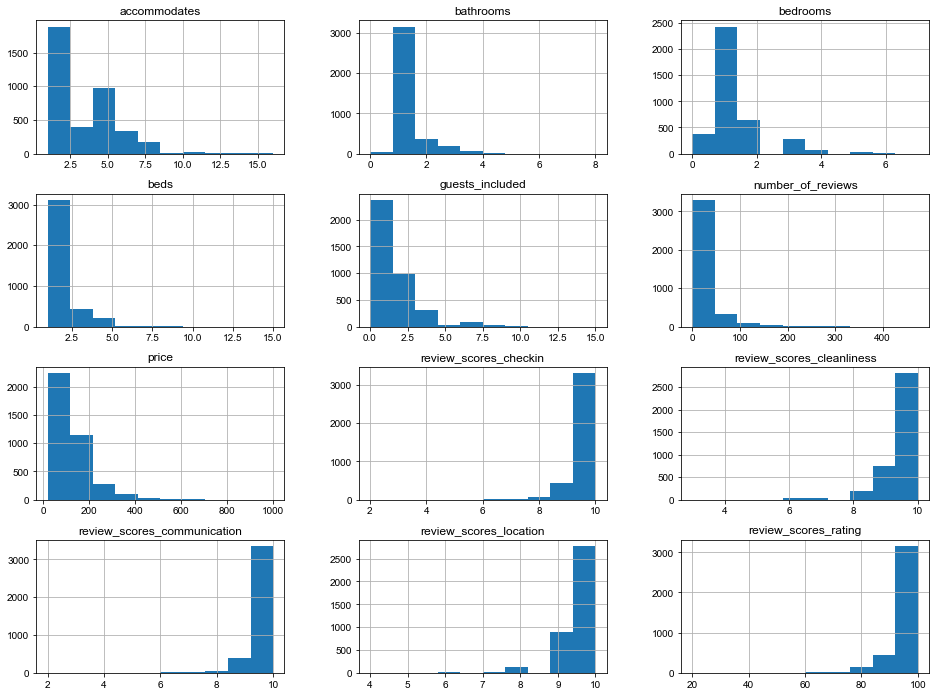

In [67]:
# display histograms of all columns in numeric_listings
numeric_listings.hist(figsize = (16, 12))
sns.set(style = 'darkgrid')
plt.show()

In [68]:
# create a correlation matrix
matrix = numeric_listings.corr()
matrix

,accommodates,bathrooms,bedrooms,beds,guests_included,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,price
accommodates,1.000000,0.537918,0.770594,0.861107,0.532796,-0.072978,-0.012023,0.010681,-0.018027,-0.012116,-0.034408,0.652218
bathrooms,0.537918,1.000000,0.610570,0.532199,0.304504,-0.091686,0.041281,0.016511,-0.002676,-0.014479,-0.008199,0.516017
bedrooms,0.770594,0.610570,1.000000,0.752944,0.456939,-0.105304,0.020972,-0.007289,0.009478,0.001007,-0.026128,0.627596
beds,0.861107,0.532199,0.752944,1.000000,0.460496,-0.089073,-0.000665,0.004370,-0.020275,-0.012351,-0.021913,0.589306
guests_included,0.532796,0.304504,0.456939,0.460496,1.000000,0.028114,-0.001301,0.016364,0.032086,0.010600,-0.024149,0.392875
number_of_reviews,-0.072978,-0.091686,-0.105304,-0.089073,0.028114,1.000000,0.034939,0.053589,0.086172,0.070316,-0.008853,-0.124695
review_scores_rating,-0.012023,0.041281,0.020972,-0.000665,-0.001301,0.034939,1.000000,0.641622,0.520164,0.540032,0.367621,0.050488
review_scores_cleanliness,0.010681,0.016511,-0.007289,0.004370,0.016364,0.053589,0.641622,1.000000,0.398377,0.388133,0.277592,0.049385
review_scores_checkin,-0.018027,-0.002676,0.009478,-0.020275,0.032086,0.086172,0.520164,0.398377,1.000000,0.684675,0.240859,0.007154
review_scores_communication,-0.012116,-0.014479,0.001007,-0.012351,0.010600,0.070316,0.540032,0.388133,0.684675,1.000000,0.279879,0.011802


In [69]:
# create a maxtrix to show correlations with price 
price_matrix = matrix['price'].sort_values(ascending = False)
price_matrix

price                          1.000000
accommodates                   0.652218
bedrooms                       0.627596
beds                           0.589306
bathrooms                      0.516017
guests_included                0.392875
review_scores_location         0.068178
review_scores_rating           0.050488
review_scores_cleanliness      0.049385
review_scores_communication    0.011802
review_scores_checkin          0.007154
number_of_reviews             -0.124695
Name: price, dtype: float64

In [70]:
pd.options.display.float_format = '{:.2f}'.format # display the number with two digits after the decimal point

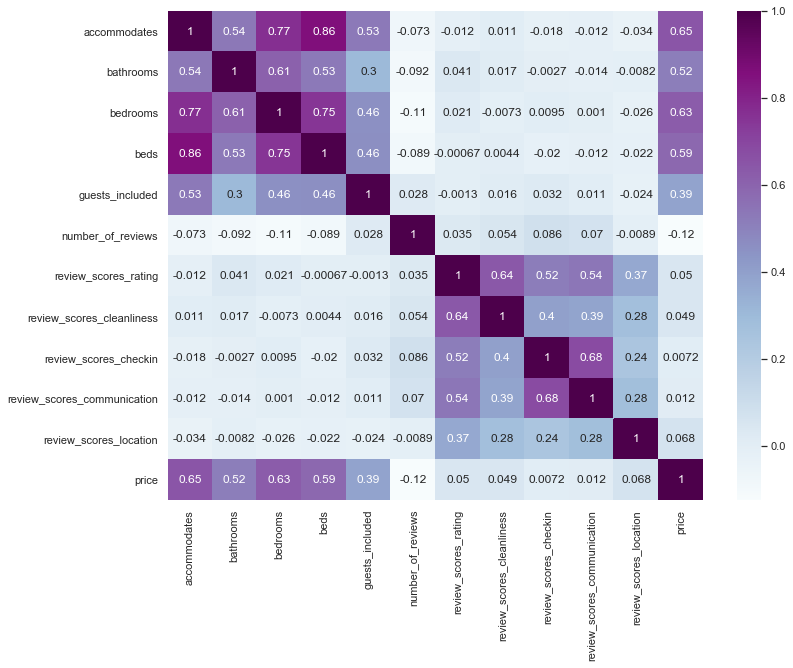

In [71]:
# create a correlation heatmap 
plt.figure(figsize = (12, 9))
sns.heatmap(matrix, annot = True, cmap = 'BuPu')

Among all the numeric variables we have explored, these are the ones that have the highest correlation scores.

guests_included:                0.39   
bathrooms:                       0.52   
square_feet:                    0.53   
beds:                            0.59   
bedrooms:                       0.63   
accommodates:                   0.65

### How about the neighborhoods? 

In [72]:
listings['price'] = numeric_listings['price'] # price column in the listings is now cleaned with proper dtype

In [77]:
# create a pivot table indexed by neighborhoods with median price
neighborhood_pivot = pd.DataFrame(listings
                                  .pivot_table(index = 'neighbourhood_cleansed',
                                               values = 'price', 
                                               aggfunc = np.median
                                               )
                                  .sort_values(by = 'price', ascending = False)
                                 )
neighborhood_pivot

,price
neighbourhood_cleansed,
Briarcliff,173.50
Pioneer Square,150.00
Westlake,150.00
Industrial District,150.00
Southeast Magnolia,150.00
...,...
Victory Heights,65.00
Bitter Lake,65.00
South Beacon Hill,60.00


In [74]:
# show top 20 neighborhoods with most listings
top_20_neighborhoods = listings['neighbourhood_cleansed'].value_counts(ascending = False).head(20)
top_20_neighborhoods

Broadway                     397
Belltown                     234
Wallingford                  167
Fremont                      158
Minor                        135
University District          122
Stevens                      119
First Hill                   108
Central Business District    103
Lower Queen Anne              94
Greenwood                     89
East Queen Anne               82
North Beacon Hill             78
Phinney Ridge                 73
Adams                         70
Mann                          67
Ravenna                       67
West Queen Anne               65
West Woodland                 64
Columbia City                 58
Name: neighbourhood_cleansed, dtype: int64

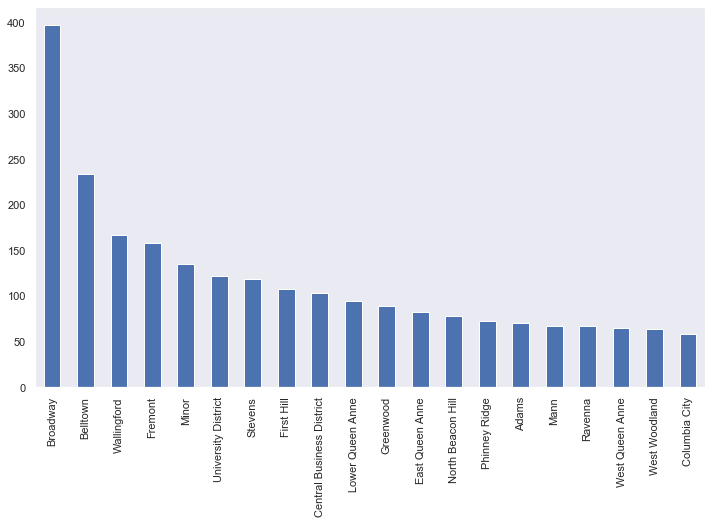

In [89]:
plot_bar(top_20_neighborhoods) # plot the bar chart

In [91]:
# find the median price for the top 20 neighborhoods
top_20_median = neighborhood_pivot.loc[top_20_neighborhoods.index].\
                               sort_values(by = 'price', ascending = False)
top_20_median

,price
Central Business District,149.00
Belltown,139.00
West Queen Anne,130.00
First Hill,127.00
East Queen Anne,125.00
Stevens,120.00
Lower Queen Anne,119.00
Fremont,106.00
Broadway,100.00
Wallingford,100.00


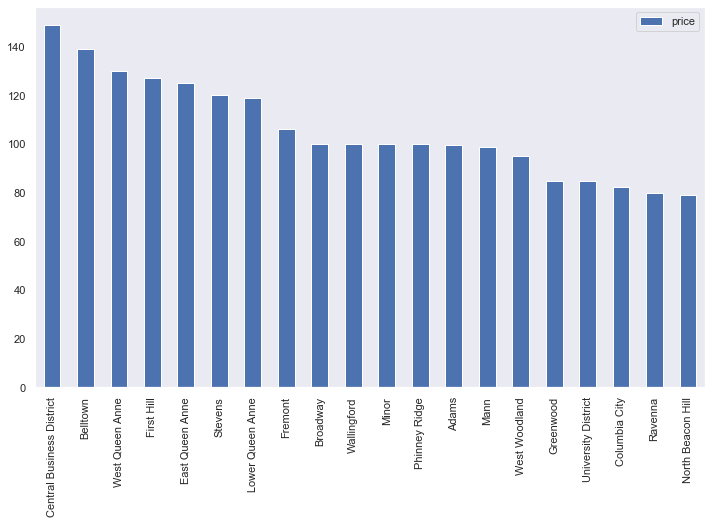

In [92]:
plot_bar(top_20_median)

### Part II: What time of the year have the highest rate? 

In [93]:
# a pivot tabled with months as index and mean price as column
calendar_pivot = calendar.pivot_table(index = 'month', values = 'price', aggfunc = np.mean)
calendar_pivot

,price
month,
1,122.91
2,124.29
3,128.64
4,135.10
5,139.54
6,147.47
7,152.09
8,150.66
9,143.26


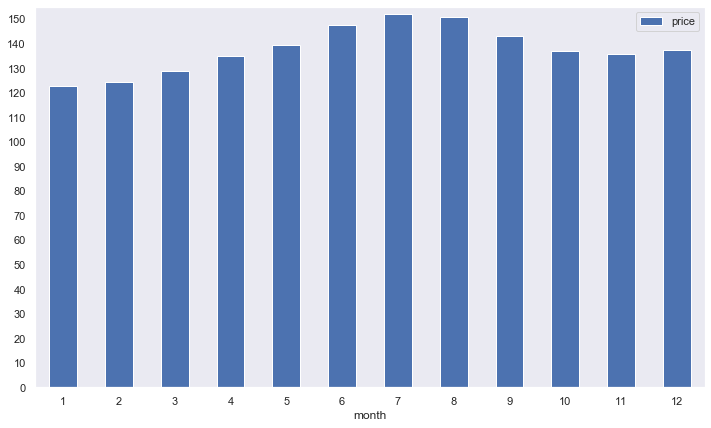

In [94]:
calendar_pivot.plot.bar(figsize = (12, 7))
plt.ylim((0, 155))
plt.yticks(np.arange(0, 160, 10))
plt.xticks(rotation = 0)
plt.show()

In [95]:
month_price_difference = (calendar_pivot['price'].max() - calendar_pivot['price'].min())/\
                          calendar_pivot['price'].min() * 100
round(month_price_difference, 2)

23.74

### Part III: What do people care most about a listing?

In [90]:
from collections import Counter
import nltk


list = ['great','stay', 'place', 'us', 'would', 
         'apartment','seattle', 'nice', 'everything', 'house', 
         'room','really', 'easy', 'definitely', 'recommend', 'time',
         ',', 'seattle.','also', 'made', 'perfect', 'home', 'close', 
         'get', 'well', 'staying',  'even', 'good','wonderful', 
         '-', 'like','enjoyed', 'one', 'stay.', 'little', 'highly',
         'overall', 'thanks', '(websitehidden)', 'experience', 'thank',
         'host', 'needed'
       ]
       
top_N = 10

stopwords = nltk.corpus.stopwords.words('english')
for word in list:
    stopwords.append(word)
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}


In [91]:
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
reviews['comments'] = (reviews['comments']
                       .str.replace('.','')
                       .str.replace(',','')
                       .str.replace(":","")
                       .str.replace("\"","")
                       .str.replace("!","")
                       .str.replace('-','')
                       .str.replace('--','')
                       .str.replace("'", '')
)


              Frequency
Word                   
clean             29021
location          28420
comfortable       24929
neighborhood      18029
downtown          15526
space             13871
quiet             12039
area              11421
bed               11270
restaurants       11194


Text(0.5, 0, 'Frequent Words')

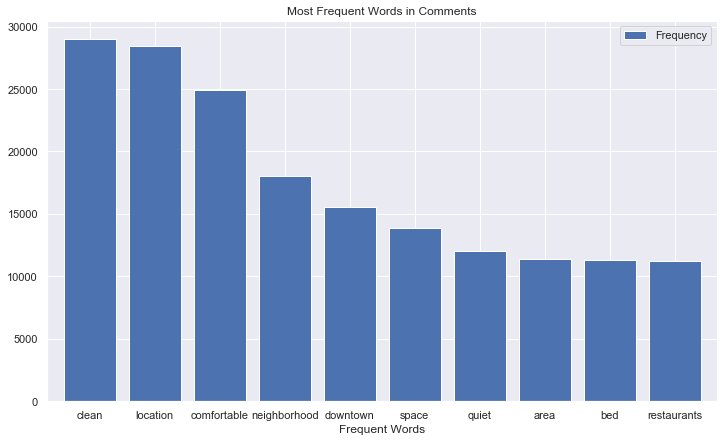

In [94]:
words = (reviews['comments']
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
         )

rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

# plot
rslt.plot.bar(rot=0, figsize=(12,7), width=0.8, fontsize = 11)
plt.title('Most Frequent Words in Comments')
plt.xlabel('Frequent Words')

# Conclusions:

1. The more guests you have, more bedrooms, bathrooms, more beds, more square feet you have that higher you can charge for your listing. In this case, the more is better.   

2. Neighborhoods like Central Business District, West Queen Anne, East Queen Anne, and First Hill are less competitive in terms of the number of listings but their median price is on the top 5.    

3. Don’t miss out on peak season from June to September when you can potentially earn 25% more than other months.

4. Having a clean place is uttermost important to your guest. Secondly, don’t forget to mention your location — Why is it a good location? Why is it convenient? Is it quiet? Is it safe? Is it close to downtown? Are there great restaurants nearby?       
